<a href="https://colab.research.google.com/github/MariuszGrecki/Machine_learning_tutorial/blob/main/classification/06_svc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Klasyfikacja - maszyna wektorów nośnych

wektor nie musi byc linia prosta może być łukowy w zalezności od użytego jądra

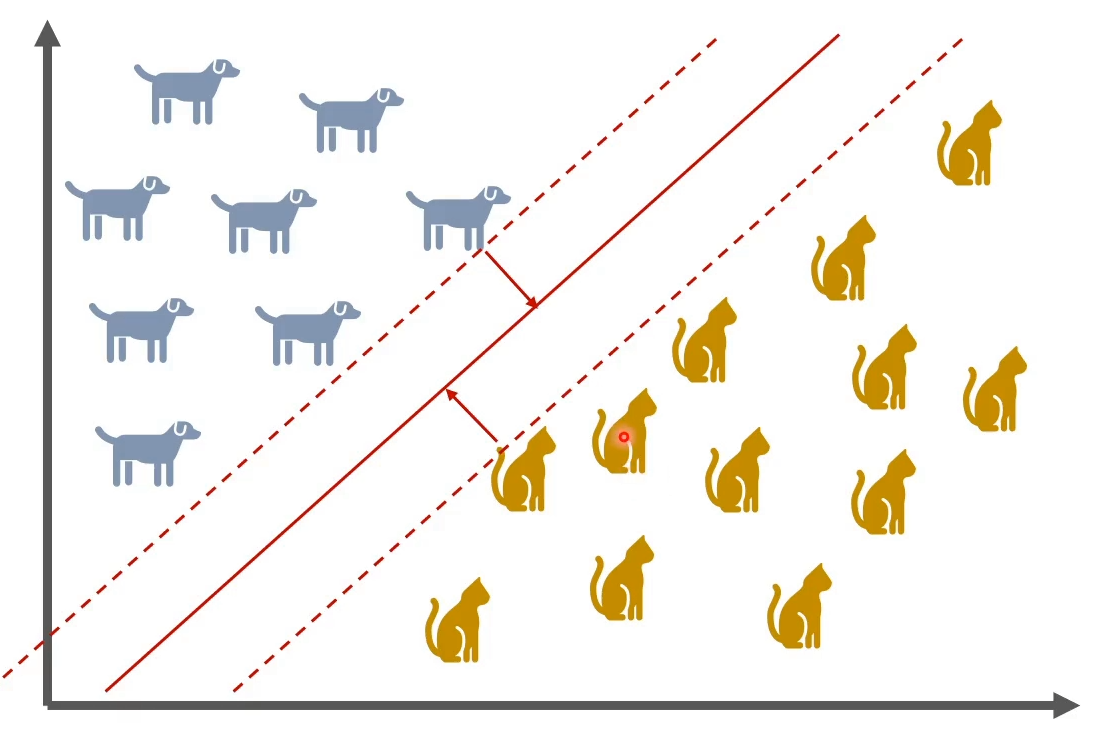

Takie rozwiązanie ma swoje wady, np. dane odstające

hard margin:
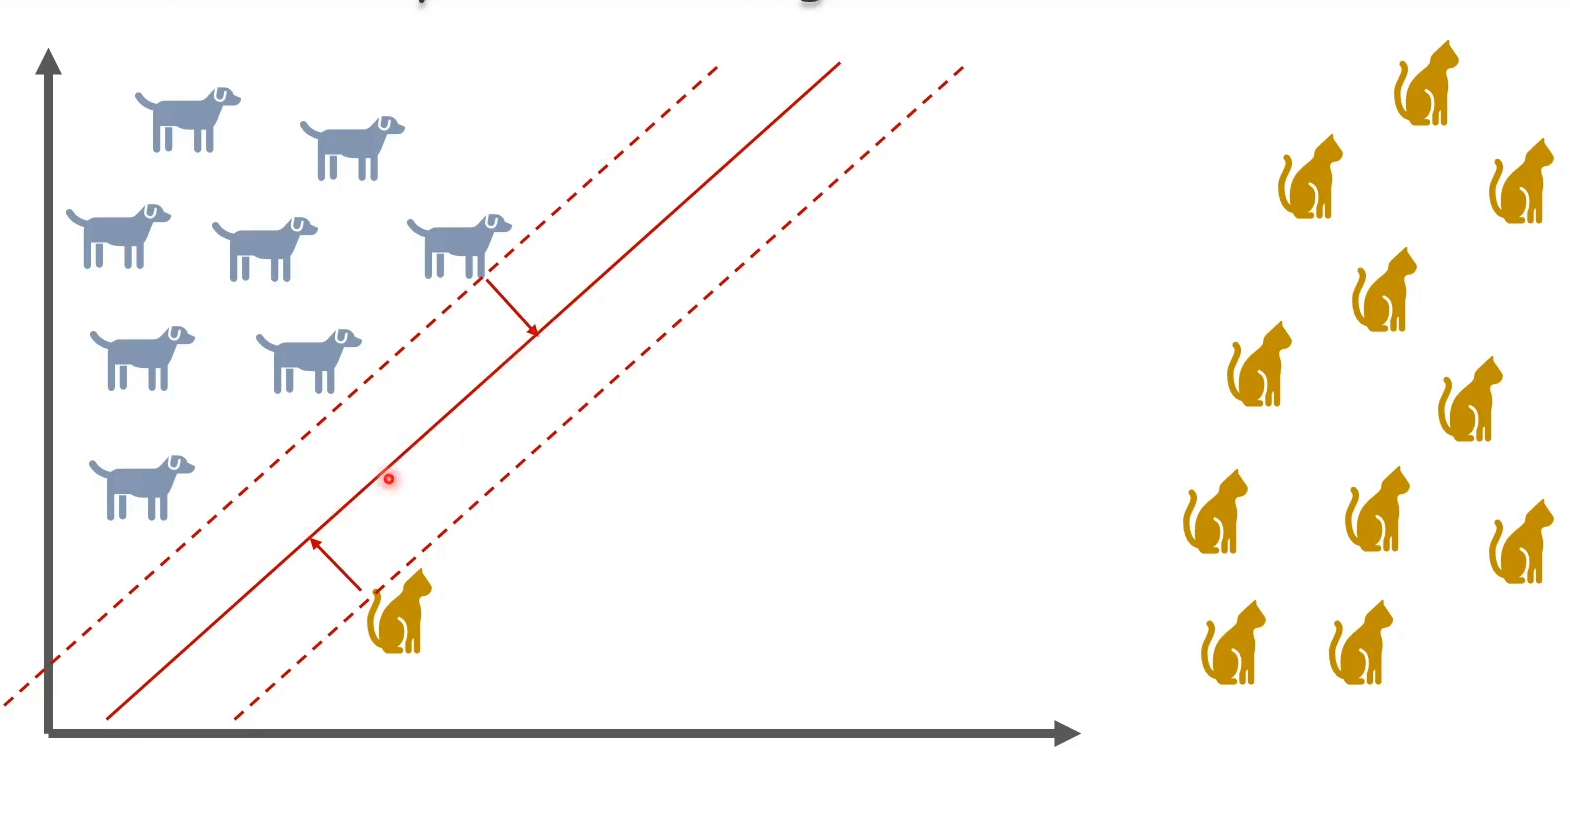

soft margin:
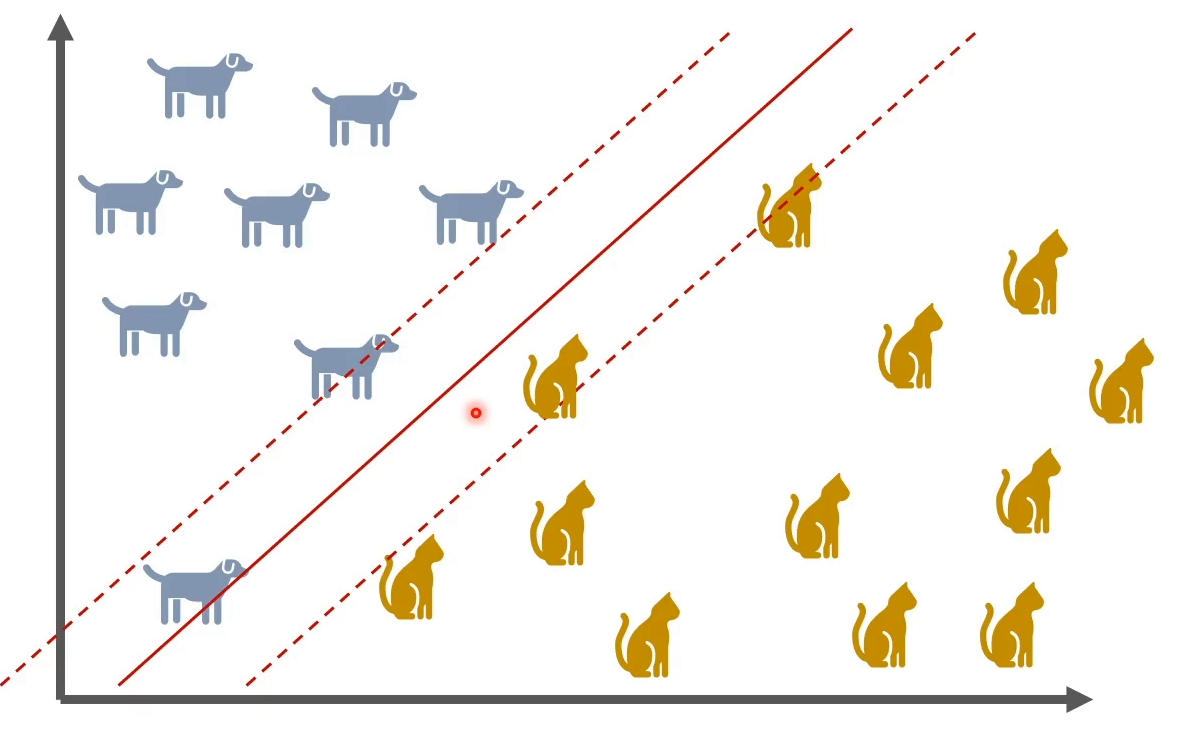

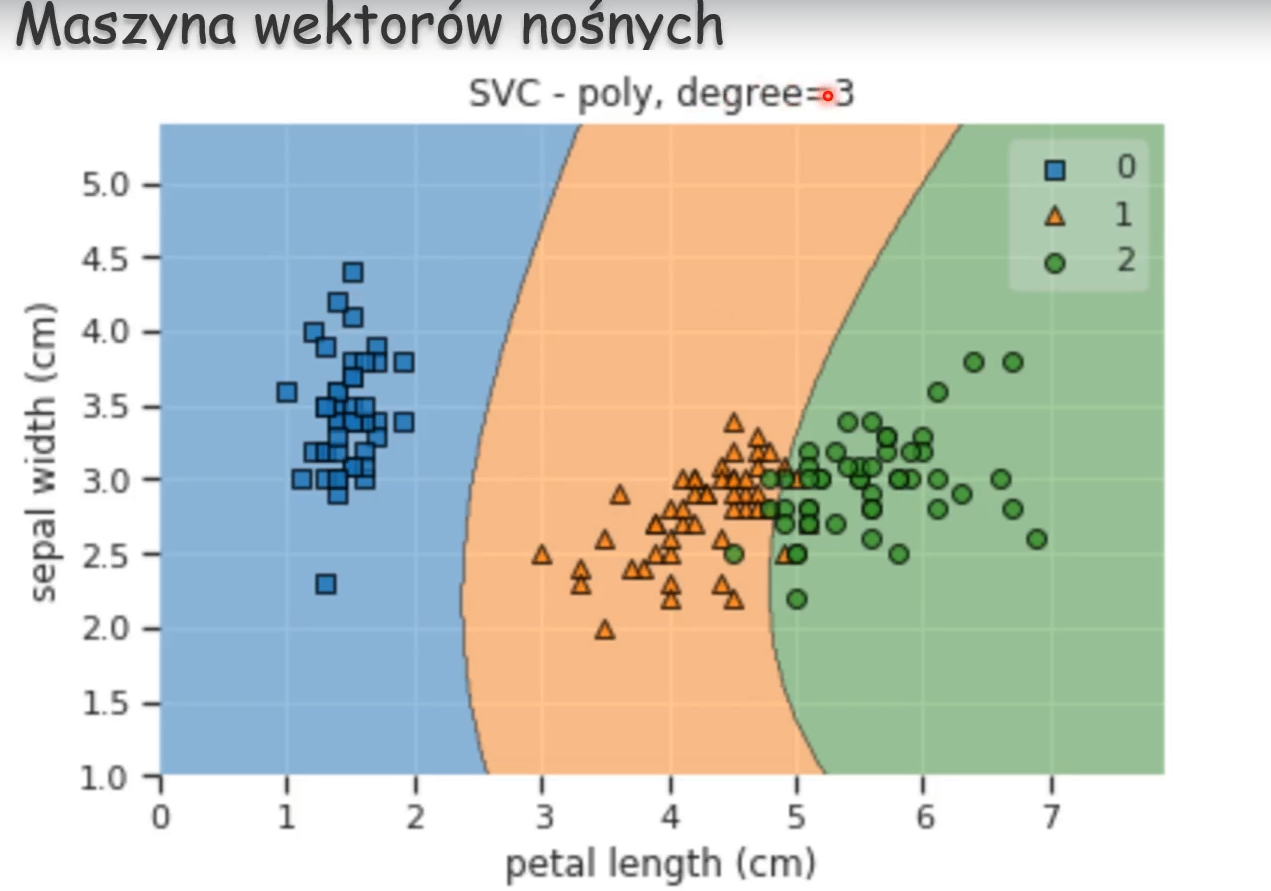

**problemy które wydają się nie byc liniowymi, równiez możemy tutaj to zaprezentować, np. poprzez przekształcanie poprzez funkcje kwadratową, lub dodanie 3 wymiaru**

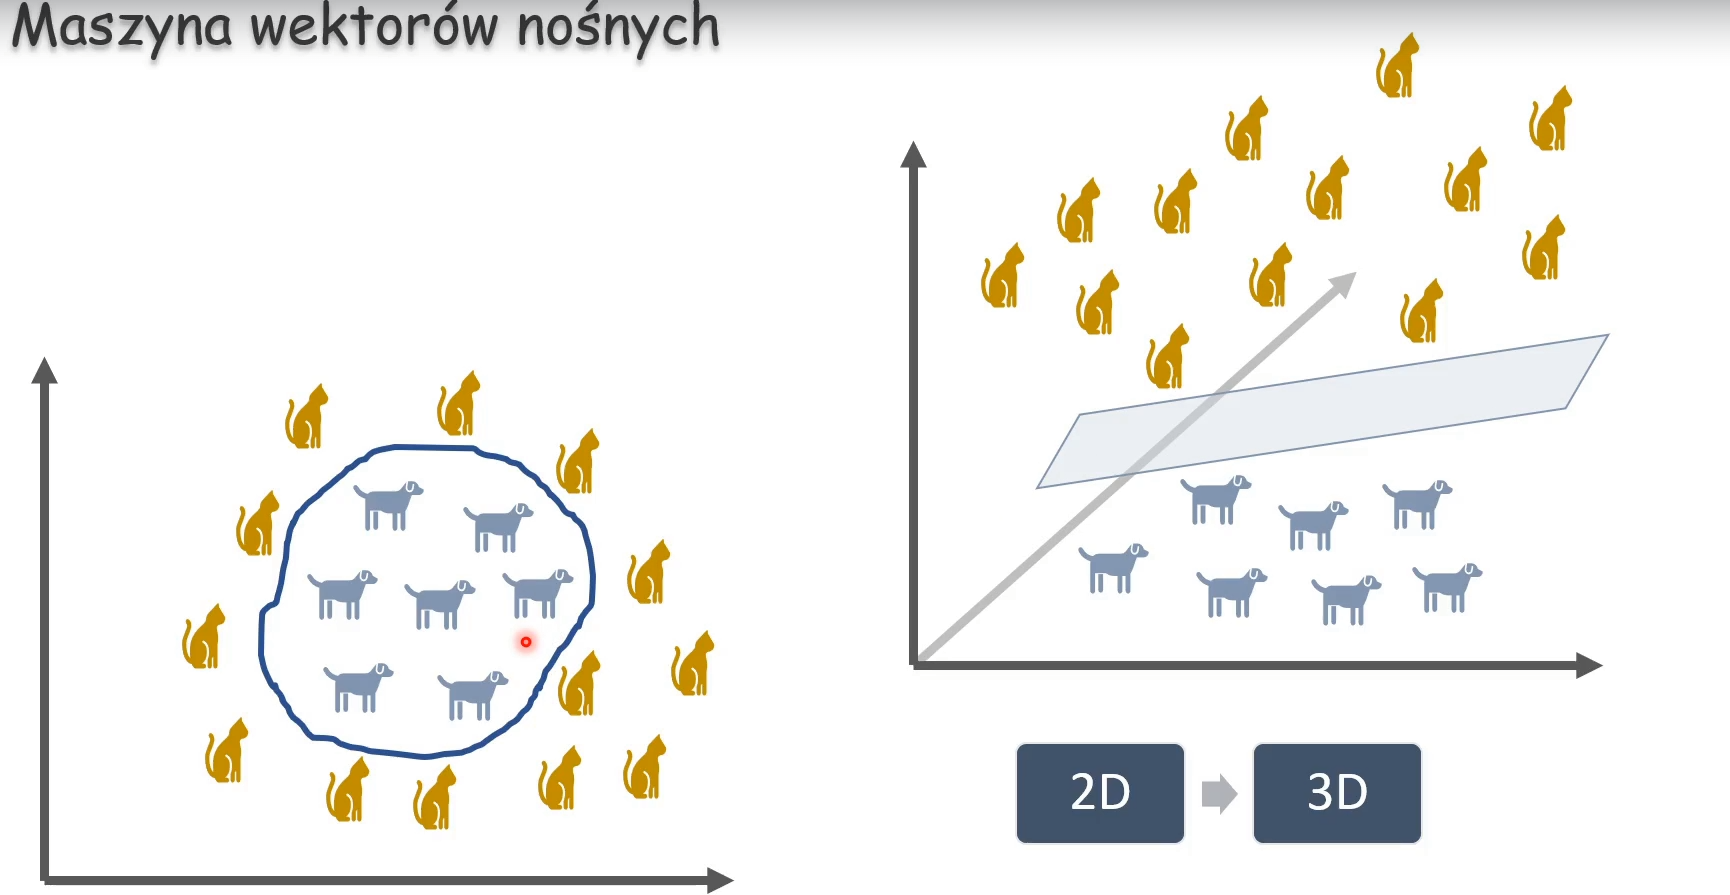

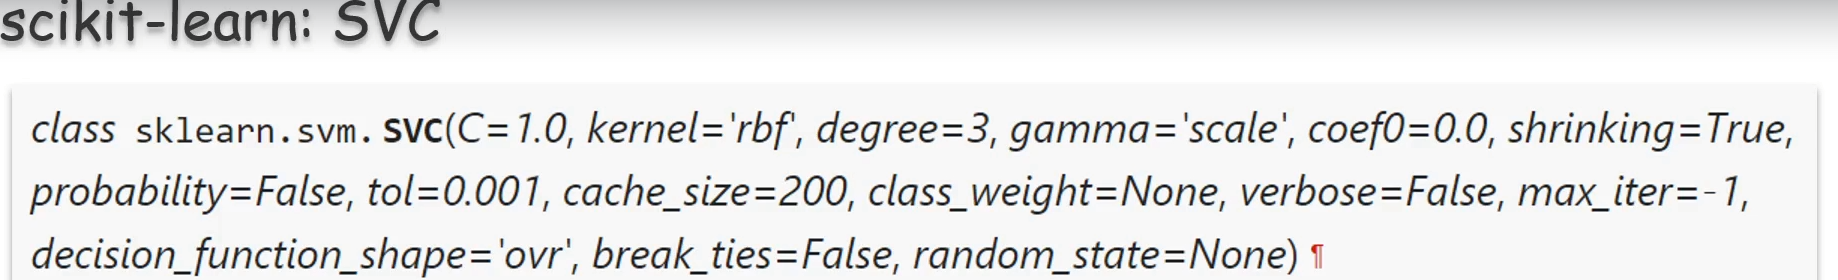

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(font_scale=1.3)
np.random.seed(42)


In [16]:
from sklearn.datasets import load_iris

raw_data = load_iris()
all_data = raw_data.copy()

data = all_data['data']
target = all_data['target']
feature_names = all_data['feature_names']
target_names = all_data['target_names']

df = pd.DataFrame(np.c_[data, target], columns=feature_names + ['target'])
# df = df[(df['target'] == 00) | (df['target'] == 1.0)]
df.head()

#ogranimycz ilośc próbek

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [17]:
data = df.iloc[:, [2,1]].values
target = df['target'].apply(int).values

print(f'{data[:5]}\n')
print(f'{target[:5]}')

[[1.4 3.5]
 [1.4 3. ]
 [1.3 3.2]
 [1.5 3.1]
 [1.4 3.6]]

[0 0 0 0 0]


In [18]:
#podział na zbiór treningowy i testowy
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data, target)

In [19]:
#standaryzacja cech - przydatne przy wektorach nośnych

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [20]:
#Klasyfikat wektorów nośnych - linear

from sklearn.svm import SVC

classifier = SVC(C=1.0, kernel='linear')
classifier.fit(X_train, y_train)


SVC(kernel='linear')

In [21]:

classifier.score(X_test, y_test)

0.9736842105263158

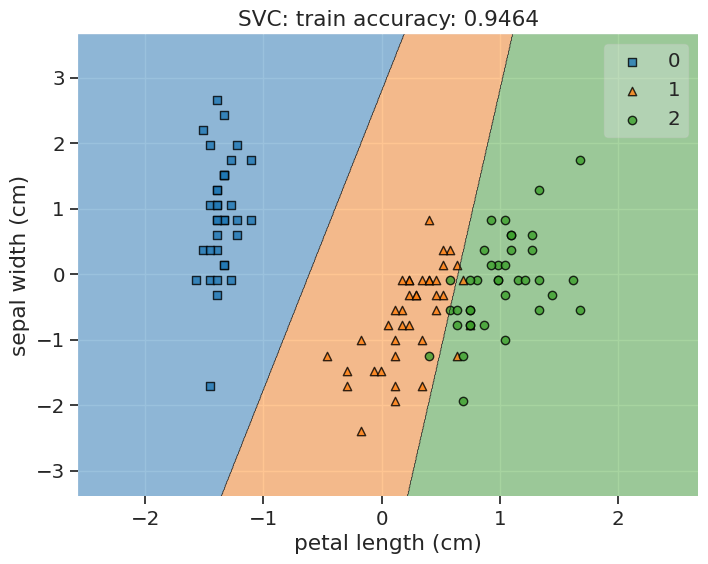

In [22]:
#wyświetlanie granic decyzyjnych

from mlxtend.plotting import plot_decision_regions

plt.figure(figsize=(8,6))
plot_decision_regions(X_train, y_train, classifier)
plt.xlabel(feature_names[2])
plt.ylabel(feature_names[1])

plt.title(f'SVC: train accuracy: {classifier.score(X_train, y_train):.4f}')
plt.show()

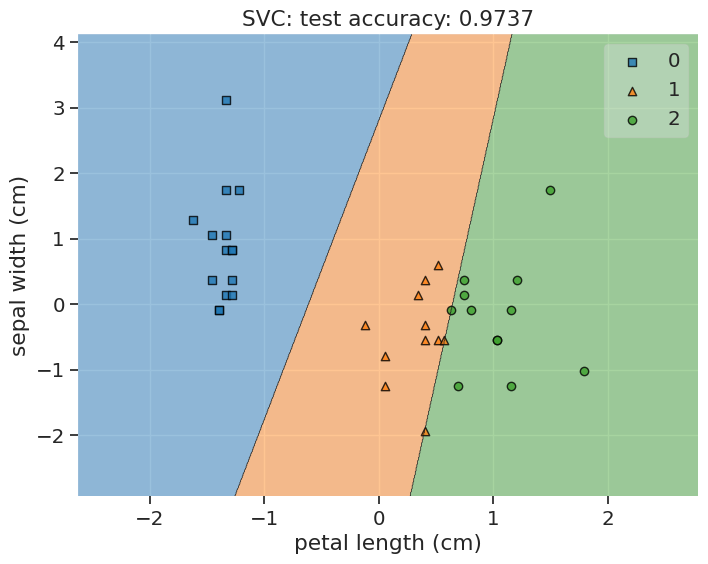

In [23]:
#wizualizacja modelu na zbiorze testowym
plt.figure(figsize=(8,6))
plot_decision_regions(X_test, y_test, classifier)
plt.xlabel(feature_names[2])
plt.ylabel(feature_names[1])
plt.title(f'SVC: test accuracy: {classifier.score(X_test, y_test):.4f}')
plt.show()

In [24]:
#Klasyfikator SVM - rbf

classifier = SVC(C=1.0, kernel='rbf')
classifier.fit(X_train, y_train)
classifier.score(X_test, y_test)

0.9736842105263158

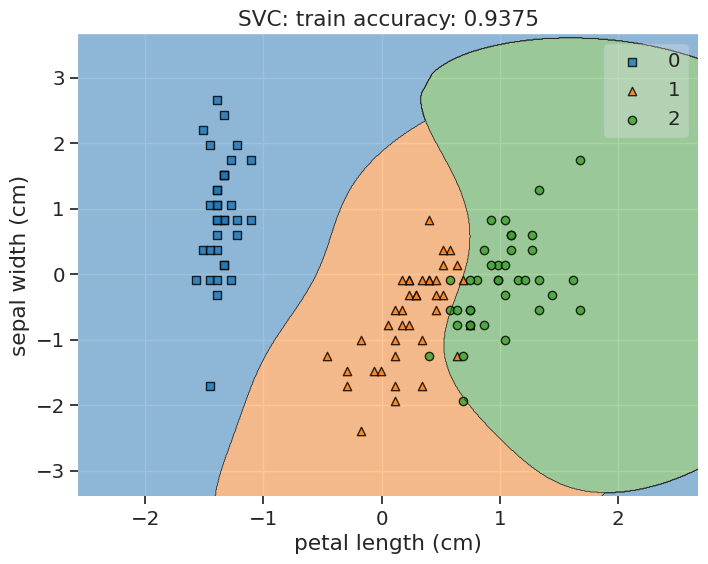

In [25]:
#wyświetlanie granic decyzyjnych


plt.figure(figsize=(8,6))
plot_decision_regions(X_train, y_train, classifier)
plt.xlabel(feature_names[2])
plt.ylabel(feature_names[1])

plt.title(f'SVC: train accuracy: {classifier.score(X_train, y_train):.4f}')
plt.show()

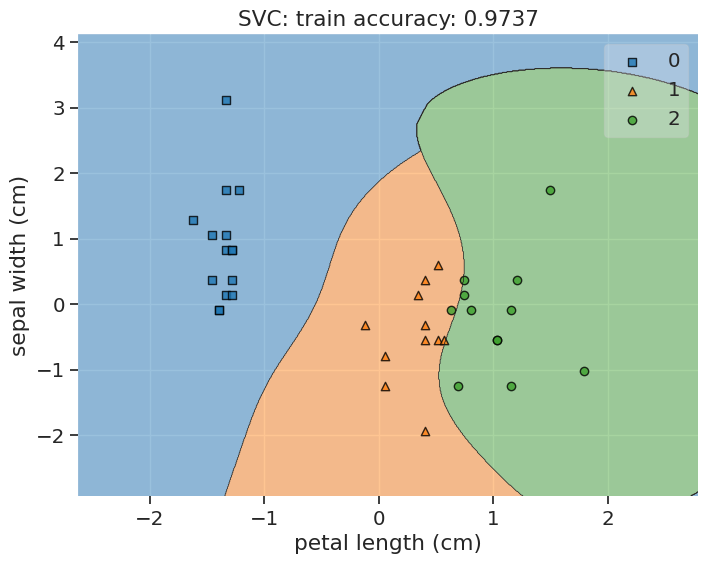

In [26]:
#wyświetlanie granic decyzyjnych

from mlxtend.plotting import plot_decision_regions

plt.figure(figsize=(8,6))
plot_decision_regions(X_test, y_test, classifier)
plt.xlabel(feature_names[2])
plt.ylabel(feature_names[1])

plt.title(f'SVC: train accuracy: {classifier.score(X_test, y_test):.4f}')
plt.show()